In [2]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob 
!pip install wordcloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/frontier-airlines"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Never ever fly with Frontier...
1,"Not Verified | My husband, our children and I..."
2,Not Verified | Love them canceling my flight ...
3,✅ Trip Verified | \r\nThis airline takes all ...
4,✅ Trip Verified | The worst airline service t...


In [5]:
df.to_csv("FA_reviews.csv")

In [6]:
import pandas as pd

csv_path = "FA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0      ✅ Trip Verified | Never ever fly with Frontier...
1      Not Verified |  My husband, our children and I...
2      Not Verified |  Love them canceling my flight ...
3      ✅ Trip Verified |  \r\nThis airline takes all ...
4      ✅ Trip Verified |  The worst airline service t...
                             ...                        
995    ✅ Trip Verified | Baltimore to Seattle. Hell N...
996    ✅ Trip Verified | Sacramento to Dallas via Las...
997    ✅ Trip Verified | I booked a flight home to go...
998    ✅ Trip Verified | Denver to Miami. I have been...
999    ✅ Trip Verified |  On February 27th, 2022 my w...
Name: reviews, Length: 1000, dtype: object


In [7]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [8]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

     Unnamed: 0                                            reviews
0             0  ver ever fly with frontier, it's an absolute d...
1             1  my husband, our children and i flew from saras...
2             2  love them canceling my flight and only giving ...
3             3  \r\nthis airline takes all joy from flying. no...
4             4  he worst airline service that i have never flo...
..          ...                                                ...
995         995  baltimore to seattle. hell no. never again fly...
996         996  sacramento to dallas via las vegas. do not fly...
997         997  i booked a flight home to go to a friend’s wed...
998         998  denver to miami. i have been a loyal customer ...
999         999  on february 27th, 2022 my wife and i departed ...

[1000 rows x 2 columns]


In [9]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0      ver ever fly with frontier its an absolute dis...
1      my husband our children and i flew from saraso...
2      love them canceling my flight and only giving ...
3      \r\nthis airline takes all joy from flying not...
4      he worst airline service that i have never flo...
                             ...                        
995    baltimore to seattle hell no never again flyin...
996    sacramento to dallas via las vegas do not fly ...
997    i booked a flight home to go to a friends wedd...
998    denver to miami i have been a loyal customer f...
999    on february 27th 2022 my wife and i departed f...
Name: reviews, Length: 1000, dtype: object


C:\Users\Mat\AppData\Local\Temp\ipykernel_36288\998233352.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [10]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

my husband our children and i flew from sarasota to philadelphia when we got to philadelphia for our return flight home we were trying to do self check in and were notified that our flight had been cancelled and that we could either choose a different flight or a refund but no other assistance was given  the guy just walked away as we tried to decide what would be best to do we chose a refund and tried to book a later flight of course they wanted more money so we went to the counter to see if they could get us on that flight for the same price of the original cancelled flight and they kept saying theres nothing we can do this company nickels and dimes for everything all the way down to charging for customer service which was none existent anyway this was our first and last flight with frontier and i will make sure that i tell everyone i come in contact with not to fly with them
['ver', 'ever', 'fly', 'with', 'frontier', 'its', 'an', 'absolute', 'disaster', 'my', 'itinerary', 'is', 'fro

In [11]:
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  ver ever fly frontier absolute disaster itiner...
1            1  husband children flew sarasota philadelphia go...
2            2  love canceling flight giving refund return won...
3            3  airline takes joy flying bargain airline orlan...
4            4  worst airline service never flown hidden fees ...
5            5  everything experience awful hidden fees disclo...
6            6  cheap going expensive trust regret whole trip ...
7            7  horrible time booked returning flight delayed ...
8            8  flight daughter chose prices cheap quickly fou...
9            9  worst airline flight got cancelled alternate o...
10          10  frontier gate staff airports especially philad...
11          11  flight departure tampa 0700 montego bay arriva...
12          12  flight went surprisingly well expecting typica...
13          13  delayed almost 2 hours would let wife infant p...
14        

In [12]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)              

     Unnamed: 0                                            reviews  polarity  \
0             0  ver ever fly frontier absolute disaster itiner... -0.007500   
1             1  husband children flew sarasota philadelphia go...  0.365625   
2             2  love canceling flight giving refund return won...  0.123810   
3             3  airline takes joy flying bargain airline orlan...  0.193750   
4             4  worst airline service never flown hidden fees ... -0.070175   
..          ...                                                ...       ...   
995         995  baltimore seattle hell never flying tried hold...  0.068155   
996         996  sacramento dallas via las vegas fly frontier e...  0.160000   
997         997  booked flight home go friends wedding several ...  0.008333   
998         998  denver miami loyal customer years also discoun... -0.028997   
999         999  february 27th 2022 wife departed terminal 3 ph...  0.096667   

          tag  
0    Negative  
1    Po

In [13]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    55.5
Neutral      2.6
Positive    41.9
dtype: float64

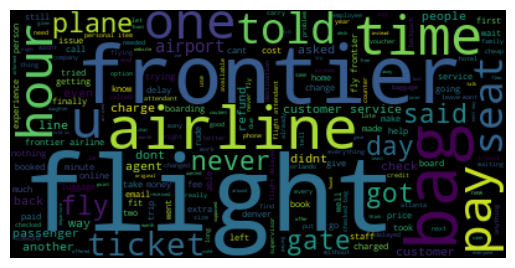

In [14]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

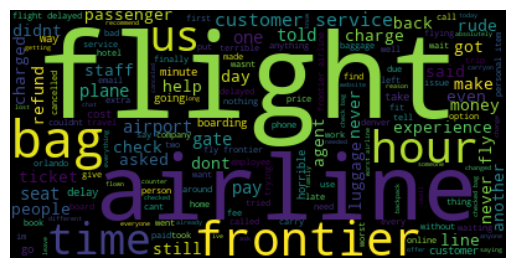

In [15]:
text2= " "        
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

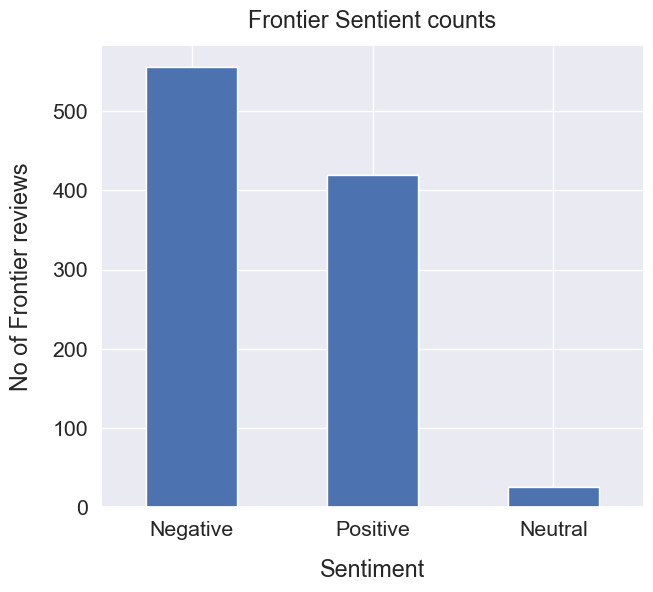

In [17]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of Frontier reviews", labelpad=14)
plt.title("Frontier Sentient counts", y=1.02);